<a href="https://colab.research.google.com/github/aivrm/Aiffel-Test/blob/main/EX_2_12_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1_%EC%86%90%EC%88%98_%EC%84%A4%EA%B3%84%ED%95%98%EB%8A%94_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%2C_%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%88%98%EC%B9%98%EB%A5%BC_%EB%A7%9E%EC%B6%B0%EB%B3%B4%EC%9E%90!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX 2-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

[공유]
[https://colab.research.google.com/drive/12MZvXUfhFTQv_MV2H05FO1XT-TdzMTbN?usp=sharing](https://colab.research.google.com/drive/12MZvXUfhFTQv_MV2H05FO1XT-TdzMTbN?usp=sharing)

---
### (1) 데이터 가져오기
* sklearn.datasets 의 load_diabetes 에서 데이터를 가져와주세요.
* diabetes 의 data 를 df_X 에, target 을 df_y 에 저장해주세요.
---

In [1243]:
from sklearn.datasets import load_diabetes

In [1244]:
diabetes = load_diabetes()

In [1245]:
type(diabetes)

sklearn.utils.Bunch

In [1246]:
# 내용 설명
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [1247]:
# 데이터셋을 대충 보기
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

In [1248]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [1249]:
print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [1250]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [1251]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [1252]:
for i, feature_name in enumerate(diabetes.feature_names):
    print('feature ', i+1, feature_name)

feature  1 age
feature  2 sex
feature  3 bmi
feature  4 bp
feature  5 s1
feature  6 s2
feature  7 s3
feature  8 s4
feature  9 s5
feature  10 s6


In [1253]:
'''
440명의 10가지 속성
      - age     (나이)
      - sex     (성별)
      - bmi     body mass index (BMI: 체질량지수)
      - bp      average blood pressure (평균 혈압)
      - s1      tc, total serum cholesterol (혈청 콜레스테롤)
      - s2      ldl, low-density lipoproteins (저밀도 지단백질)
      - s3      hdl, high-density lipoproteins (고밀도 지단백질)
      - s4      tch, total cholesterol / HDL (총 콜레스테롤)
      - s5      ltg, possibly log of serum triglycerides level (혈청 트리글리세리드 수준의 가능한 로그)
      - s6      glu, blood sugar level (혈당 수치)
'''

'\n440명의 10가지 속성\n      - age     (나이)\n      - sex     (성별)\n      - bmi     body mass index (BMI: 체질량지수)\n      - bp      average blood pressure (평균 혈압)\n      - s1      tc, total serum cholesterol (혈청 콜레스테롤)\n      - s2      ldl, low-density lipoproteins (저밀도 지단백질)\n      - s3      hdl, high-density lipoproteins (고밀도 지단백질)\n      - s4      tch, total cholesterol / HDL (총 콜레스테롤)\n      - s5      ltg, possibly log of serum triglycerides level (혈청 트리글리세리드 수준의 가능한 로그)\n      - s6      glu, blood sugar level (혈당 수치)\n'

In [1254]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [1255]:
data = diabetes.data

In [1256]:
# diabetes 의 data 는 2차원
data.shape

(442, 10)

In [1257]:
type(data)

numpy.ndarray

In [1258]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

---
###### pandas

In [1259]:
import pandas as pd

In [1260]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [1261]:
type(diabetes.feature_names)

list

###### df_X 에 저장

In [1262]:
df_X = pd.DataFrame(data=data, columns=diabetes.feature_names)
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [1263]:
type(df_X)

pandas.core.frame.DataFrame

###### df_y 에 저장

In [1264]:
type(diabetes.target)

numpy.ndarray

In [1265]:
# diabetes 의 data 는 2차원인 반면, target 은 1차원이다.
diabetes.target.shape

(442,)

In [1266]:
# columns 에는 list 형식으로 넣어야 한다.
df_y = pd.DataFrame(data=diabetes.target, columns=['label'])
df_y

,label
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [1267]:
type(df_y)

pandas.core.frame.DataFrame

In [1268]:
# diabetes 의 target 은 1차원 인데,
# pandas 로 읽어들이니, 2차원으로 바뀌었다.
df_y.shape

(442, 1)

---
### (2)  모델에 입력할 데이터 X 준비하기
---

In [1269]:
# diabetes = load_diabetes() 하면, sklearn.utils.Bunch 로 나오는데,
# data 와 target 은 numpy.ndarray 이므로,
# pandas에서 읽어서 .values 로 다시 numpy.ndarray 로 바꿀 필요는 없지만......
'''
diabetes = load_diabetes()
X = diabetes.data
type(X)
'''

'\ndiabetes = load_diabetes()\nX = diabetes.data\ntype(X)\n'

In [1270]:
df_X.loc[:, 'age':'s6']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [1271]:
X = df_X.loc[:, 'age':'s6'].values

In [1272]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [1273]:
X.shape

(442, 10)

In [1274]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [1275]:
type(X)

numpy.ndarray

---
### (3)  모델에 입력할 데이터 y 준비하기
---

In [1276]:
# diabetes = load_diabetes() 하면, sklearn.utils.Bunch 로 나오는데,
# data 와 target 은 numpy.ndarray 이므로,
# pandas에서 읽어서 .values 로 다시 numpy.ndarray 로 바꿀 필요는 없었다.
'''
diabetes = load_diabetes()
y = diabetes.target
type(y)
'''

'\ndiabetes = load_diabetes()\ny = diabetes.target\ntype(y)\n'

In [1277]:
# 1차원으로 됨.
y = df_y.loc[:, 'label'].values

In [1278]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [1279]:
y.shape

(442,)

In [1280]:
type(y)

numpy.ndarray

---
### (4) train 데이터와 test 데이터로 분리하기
---

In [1281]:
# 데이타를 학습과 평가용으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print('X_train 개수: ', len(X_train))
print('X_test 개수 : ', len(X_test))

(353, 10) (353,)
(89, 10) (89,)
X_train 개수:  353
X_test 개수 :  89


In [1282]:
X_train.shape, y_train.shape

((353, 10), (353,))

In [1283]:
X_test.shape, y_test.shape

((89, 10), (89,))

In [1284]:
#y_train, y_test

---
### (5) 모델 준비하기
---

#### W , b

In [1285]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [1286]:
W

array([0.59771469, 0.72089107, 0.5826529 , 0.11665421, 0.34071442,
       0.81299547, 0.05426116, 0.84168973, 0.01374557, 0.85600662])

In [1287]:
b

0.5156378274141915

#### 모델

In [1288]:
### 모델
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

---
### (6) 손실함수 loss 정의하기
---

In [1289]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [1290]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

---
### (7) 기울기를 구하는 gradient 함수 구하기
---

In [1291]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [1292]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.5233596   -13.64879236 -189.53352535 -142.64802244  -68.21699912
  -55.89211412  127.52864676 -138.87243945 -182.84371257 -123.4148961 ]
db: -303.23569267096343


---
### (8) 하이퍼 파라미터 인 학습률 설정하기
---

In [1293]:
#LEARNING_RATE = 0.0001
LEARNING_RATE = 0.1

---
### (9) 모델 학습하기
---

In [1294]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4524.7891
Iteration 20 : Loss 3658.2550
Iteration 30 : Loss 3381.9514
Iteration 40 : Loss 3229.5175
Iteration 50 : Loss 3132.8464
Iteration 60 : Loss 3067.3219
Iteration 70 : Loss 3021.4682
Iteration 80 : Loss 2988.8411
Iteration 90 : Loss 2965.3788
Iteration 100 : Loss 2948.3658
Iteration 110 : Loss 2935.9351
Iteration 120 : Loss 2926.7840
Iteration 130 : Loss 2919.9957
Iteration 140 : Loss 2914.9205
Iteration 150 : Loss 2911.0952
Iteration 160 : Loss 2908.1876
Iteration 170 : Loss 2905.9583
Iteration 180 : Loss 2904.2335
Iteration 190 : Loss 2902.8864
Iteration 200 : Loss 2901.8239
Iteration 210 : Loss 2900.9774
Iteration 220 : Loss 2900.2956
Iteration 230 : Loss 2899.7406
Iteration 240 : Loss 2899.2833
Iteration 250 : Loss 2898.9023
Iteration 260 : Loss 2898.5807
Iteration 270 : Loss 2898.3060
Iteration 280 : Loss 2898.0683
Iteration 290 : Loss 2897.8601
Iteration 300 : Loss 2897.6754
Iteration 310 : Loss 2897.5095
Iteration 320 : Loss 2897.3589
Iteration 330 : L

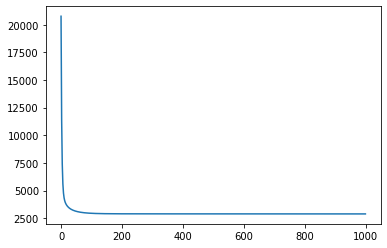

In [1295]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [1296]:
W, b

(array([  41.99912076, -240.26505678,  556.83199623,  342.96222381,
        -181.81449966,  -67.8068291 , -175.52208088,  167.48202266,
         450.16282586,   54.06569824]), 151.30724387317358)

---
### (10) test 데이터에 대한 성능 확인하기
---

In [1297]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2885.54906033658

---
### (11) 정답 데이터와 예측한 데이터 시각화 하기
---

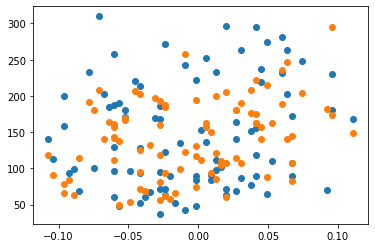

In [1298]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

---
---
---
사이킷런 과 비교
---
---
---



In [1299]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(model._estimator_type)

regressor


In [1300]:
model = LinearRegression()

In [1301]:
# 학습
model.fit(X_train, y_train)

LinearRegression()

In [1302]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [1303]:
y_pred.shape

(89,)

In [1304]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [1305]:
y_test.shape

(89,)

In [1306]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

2900.1732878832318

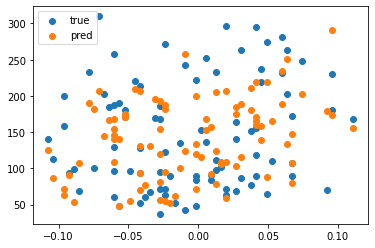

In [1307]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], y_pred, label="pred")
plt.legend()
plt.show()